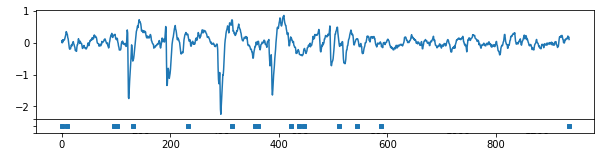

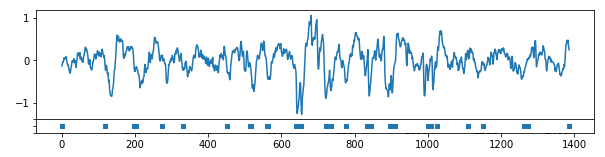

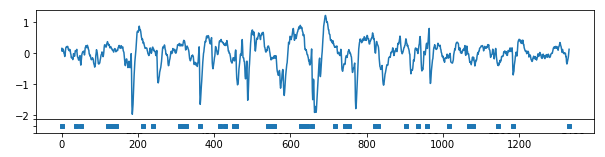

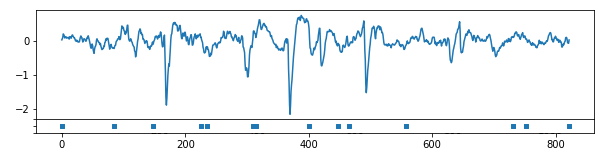

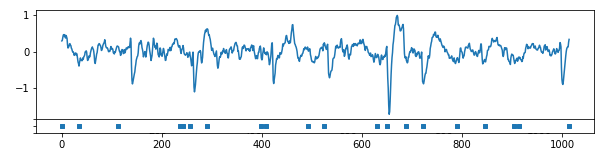

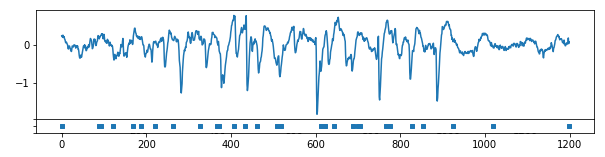

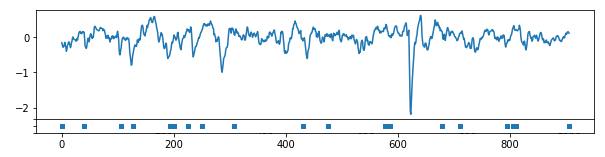

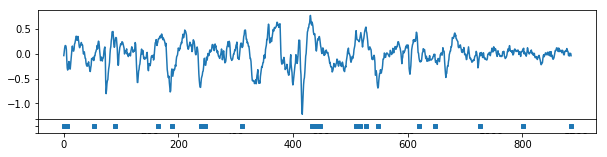

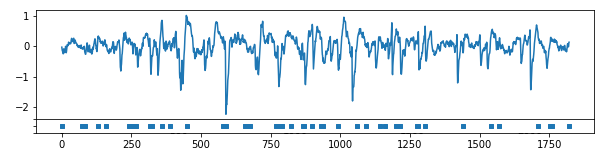

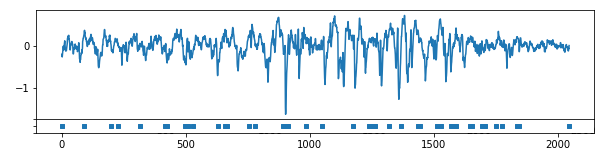

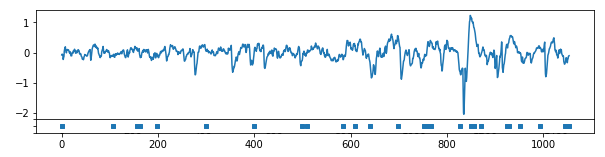

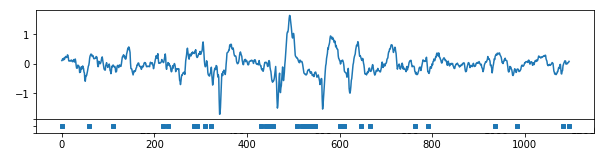

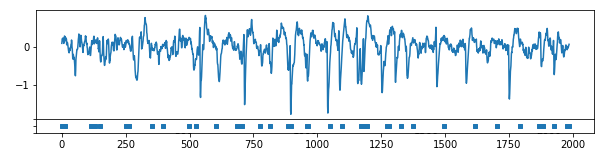

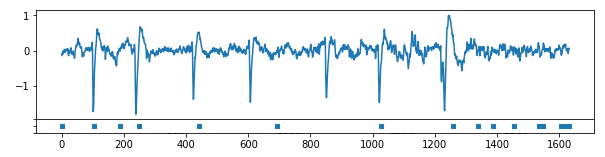

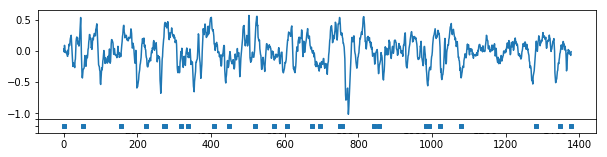

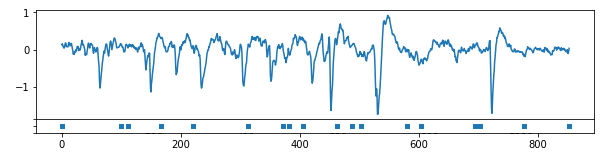

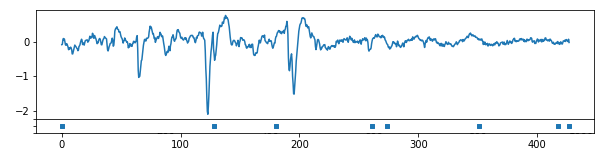

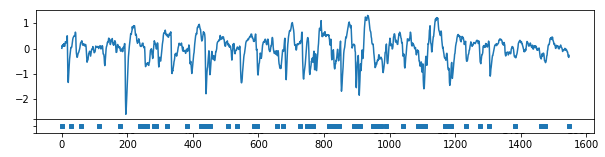

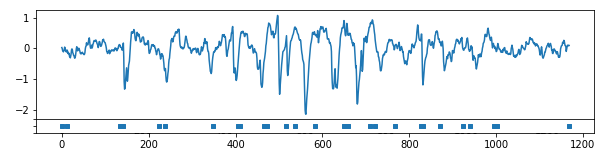

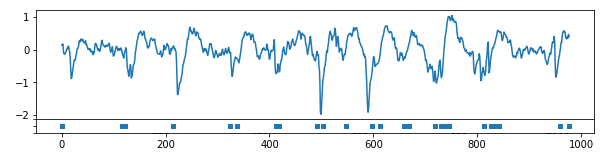

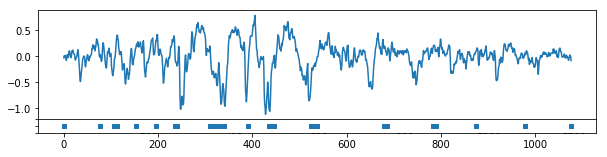

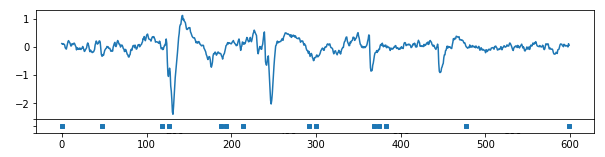

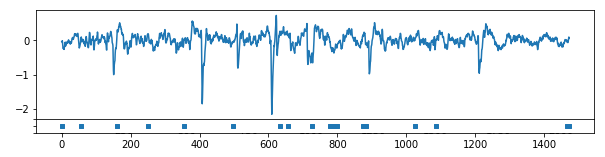

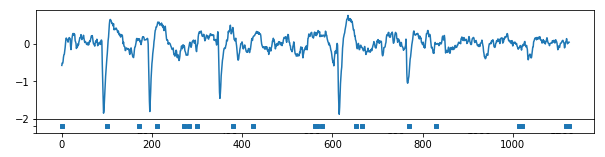

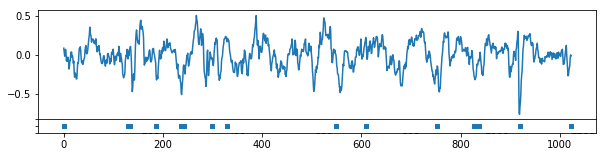

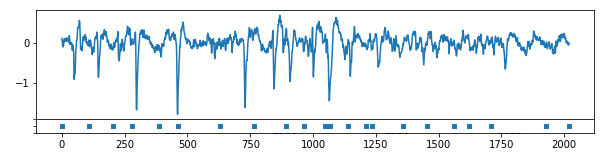

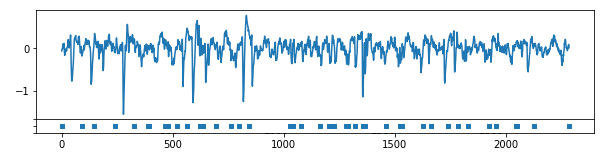

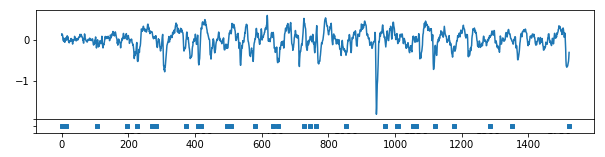

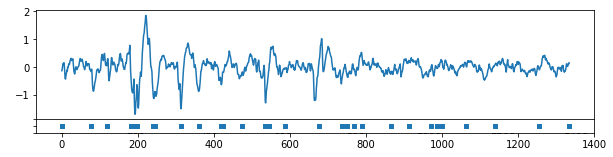

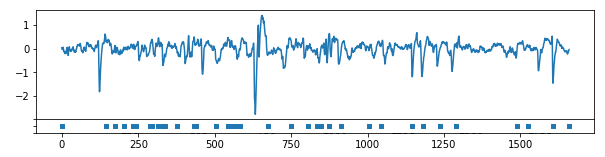

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import math

#ファイルの読み込み                                                                                                                         
#file_name1 = sys.argv[1]                                                                                                                   
#file_name2 = sys.argv[2]                                                                                                                   
#file1 = pd.ExcelFile(file_name1+'.xlsx')                                                                                                   
#file2 = pd.ExcelFile(file_name2+'.xlsx')                                                                                                   

#file1 = pd.ExcelFile(sys.argv[1])
file1 = pd.ExcelFile("/home/nodoka/win/ubuntu/01-data/restraint-25000/B39-HR/B39-restraint-R2.xlsx")
#file2 = pd.ExcelFile(sys.argv[2])

sheet_df1 = file1.parse(file1.sheet_names, header=None)
#sheet_df2 = file2.parse(file2.sheet_names, header=None)

#cmap = plt.get_cmap("tab20")                                                                                                               

sheet_names1 = file1.sheet_names
#sheet_names2 = file2.sheet_names

cannel_start = 10
cannel_end = 5


def inspect(time_leng, pattern_leng, count_data):
    #ファイル1のデータカウント                                                                                                              
    pattern_dict1 = {}
    sumpsth = 0
    for i, name in enumerate(sheet_names1):
        sheet_df1[i] = file1.parse(name)
        try :
        #print(sheet_df1[i][1][1])                                                                                                          
            start_number = (np.where(sheet_df1[i]['INFORMATION']=="CHANNEL")[0][0]) +cannel_start
            end_number = (np.where(sheet_df1[i]['INFORMATION']=="CHANNEL")[0][1]) - cannel_end
            sig_ori = (sheet_df1[i]['INFORMATION'][start_number : end_number]).values
            sig1 = (sheet_df1[i]['Unnamed: 3'][start_number : end_number]).values
        except KeyError :
            print("not max data number")
            break
        sig1 = sig1.astype("int")
        #print(len(sig1))                                                                                                                   
        sig1 = np.trim_zeros(sig1)
#        print()                                                                                                                            
        leng = len(sig1)
        psth = np.zeros(int((leng/time_leng)+1), dtype=np.int)
        l = 0
        for k in range(0, leng, time_leng) :
            psth[l] = sig1[k : k+time_leng].sum()
            l += 1
#        print(sig1[len(psth)-1])                                                                                                           
        if(len(psth) > pattern_leng) :
            for k in range(len(psth) - pattern_leng +1) :   # PSTHデータからはパターンを重ねて検索している                                  
                if (str(psth[k : k + pattern_leng]) in pattern_dict1) :
                    pattern_dict1[str(psth[k : k + pattern_leng])] += 1
                else :
                    pattern_dict1[str(psth[k : k + pattern_leng])] = 1
            sumpsth += (len(psth) -pattern_leng+1)
        plt.figure(figsize=(10, 4))
        plt.subplot(2, 1, 1)
        plt.subplots_adjust(wspace=0.0, hspace=0)
        #plt.figure()
        plt.plot(sig_ori)
        plt.subplot(16, 1, 9)
        plt.ylim(0.95, 1.05)
        plt.yticks(color="None")
        plt.scatter(range(len(sig1)),sig1,marker='s', s=10)
        #plt.close()
#    print()                                        

#file1 = pd.ExcelFile(sys.argv[1])


#parameter1_start = int(sys.argv[3])
#parameter1_end = int(sys.argv[4])
parameter1_start = 1
parameter1_end = 1

#parameter2_start = int(sys.argv[5])
#parameter2_end = int(sys.argv[6])
parameter2_start = 1
parameter2_end = 1

#step = int(sys.argv[7])


#file_kull = open("divergence.txt", "a")
#file_data = open("data-ab.txt", "a")
count_data = open("count_data.csv", "a")
inspect(1,1, count_data)